–ì—Ä—É–ø–ø–∞ –ê–¥—ã–≥–µ–π—Å–∫–æ–≥–æ –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç–∞ (–ê–ì–£)

https://vk.com/agu01

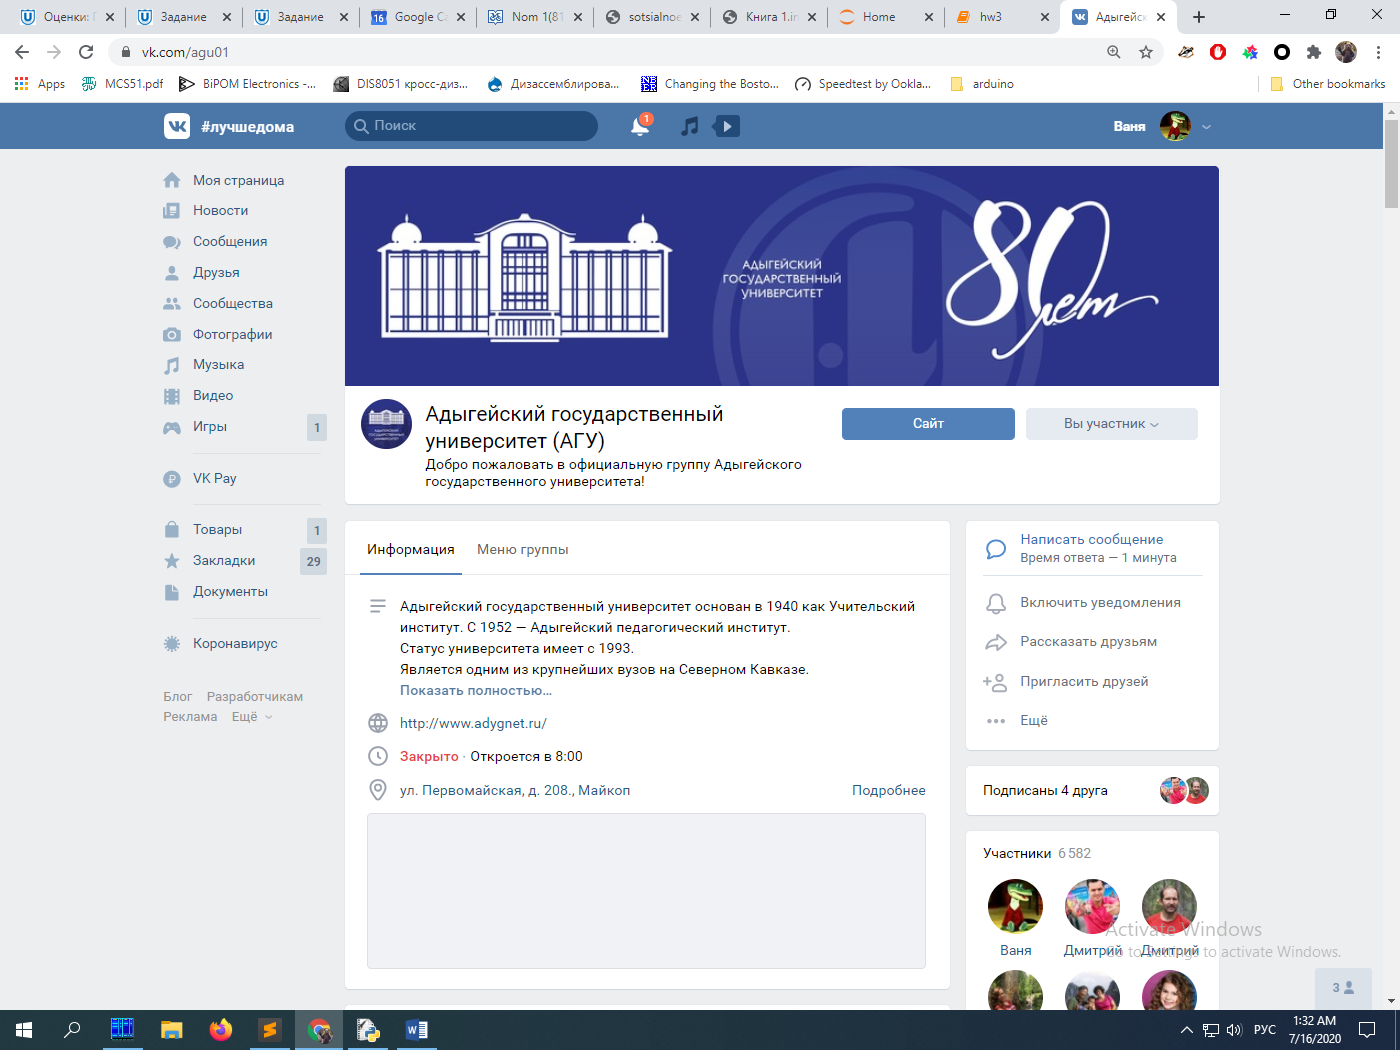

In [1]:
import numpy as np
import pandas as pd
import datetime
import itertools
from collections import Counter
import requests
import json

%matplotlib inline

In [2]:
df = pd.read_csv("agu.csv")
df.head()

id first_name    last_name is_closed can_access_closed  sex  \
0  130892       –í–ª–∞–¥       –°–∏–Ω–µ–æ–∫      True             False    2   
1  153472     –°–µ—Ä—ë–≥–∞  –°–æ—Ä–æ–∫–æ–ª–∞—Ç–æ–≤     False              True    2   
2  163719       –û–ª–µ–≥     –ü—Ä–æ—ç–∫—Ç–æ—Ä     False              True    2   
3  205024    –î–º–∏—Ç—Ä–∏–π   –ú–∞—Ä—Ç—ã–Ω–µ–Ω–∫–æ     False              True    2   
4  209802      –ó–≤–µ—Ä—å      –§–æ–º–æ—Ä–æ–≤      True             False    1   

         domain  country_id country_title      bdate  ...  \
0      id130892         1.0        –†–æ—Å—Å–∏—è  10.5.1985  ...   
1         pysu4         1.0        –†–æ—Å—Å–∏—è  30.4.1989  ...   
2     misterpro         1.0        –†–æ—Å—Å–∏—è  19.3.1986  ...   
3      id205024         1.0        –†–æ—Å—Å–∏—è        NaN  ...   
4  fomors_beast         1.0        –†–æ—Å—Å–∏—è        NaN  ...   

   status_audio_artist status_audio_id  status_audio_owner_id  \
0                  NaN             NaN                    NaN   
1                  NaN             NaN                    NaN   
2                  NaN             NaN                    NaN   
3                  NaN             NaN                    NaN   
4                  NaN             NaN                    NaN   

  status_audio_title  status_audio_duration  status_audio_url  \
0                NaN                    NaN               NaN   
1                NaN                    NaN               NaN   
2                NaN                    NaN               NaN   
3                NaN                    NaN               NaN   
4                NaN                    NaN               NaN   

  status_audio_date status_audio_is_hq status_audio_main_artists  \
0               NaN                NaN                       NaN   
1               NaN                NaN                       NaN   
2               NaN                NaN                       NaN   
3               NaN                NaN                       NaN   
4               NaN                NaN                       NaN   

  status_audio_genre_id  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 89 columns]

In [3]:
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤:", df.shape[0])

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤: 6581


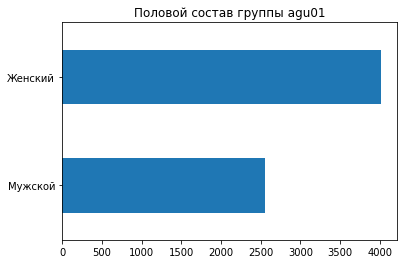

In [4]:
def f(x):
    if x == 2:
        return "–ú—É–∂—Å–∫–æ–π"
    elif x == 1:
        return "–ñ–µ–Ω—Å–∫–∏–π"
    return np.nan

df["sex"].map(f).dropna().value_counts().sort_values().plot(kind='barh', title="–ü–æ–ª–æ–≤–æ–π —Å–æ—Å—Ç–∞–≤ –≥—Ä—É–ø–ø—ã agu01")

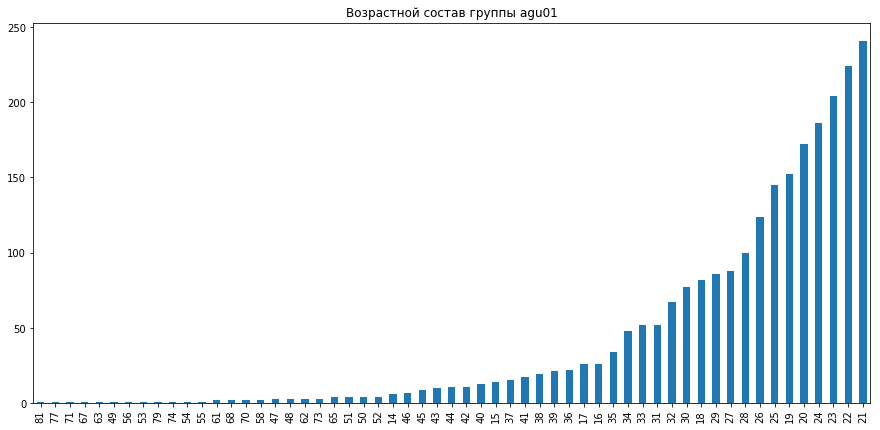

In [5]:
# –≤–æ–∑—Ä–∞—Å—Ç–Ω–æ–π —Å–æ—Å—Ç–∞–≤ –≥—Ä—É–ø–ø—ã

def f(x):
    try:
        dt = datetime.datetime.strptime(x, '%d.%m.%Y').date()
        diff = datetime.datetime.now().date() - dt        
        return np.trunc(diff.days / 365.25)
    except:
        return np.nan
    
bdates = df["bdate"].map(f).dropna().astype(int)
bdates = bdates[bdates < 90]  # –ø–æ—Ö–æ–∂–µ –Ω–∞ –º—É—Å–æ—Ä
bdates.value_counts().sort_values().plot(kind='bar', figsize=(15, 7), title="–í–æ–∑—Ä–∞—Å—Ç–Ω–æ–π —Å–æ—Å—Ç–∞–≤ –≥—Ä—É–ø–ø—ã agu01")

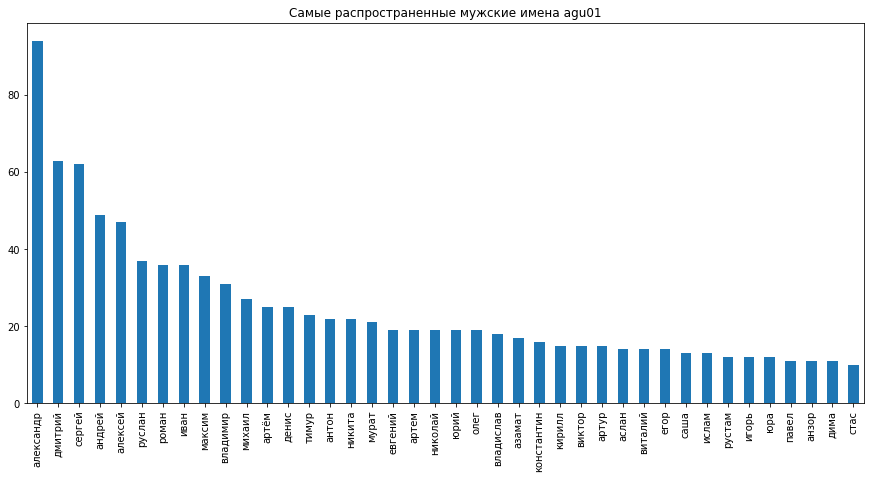

In [24]:
male_names = df[df["sex"] == 2]["first_name"].str.lower()
male_names = male_names[male_names != "deleted"]
male_names.value_counts().sort_values(ascending=False)\
    .head(40).plot(kind='bar', figsize=(15, 7), title="–°–∞–º—ã–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã–µ –º—É–∂—Å–∫–∏–µ –∏–º–µ–Ω–∞ agu01")

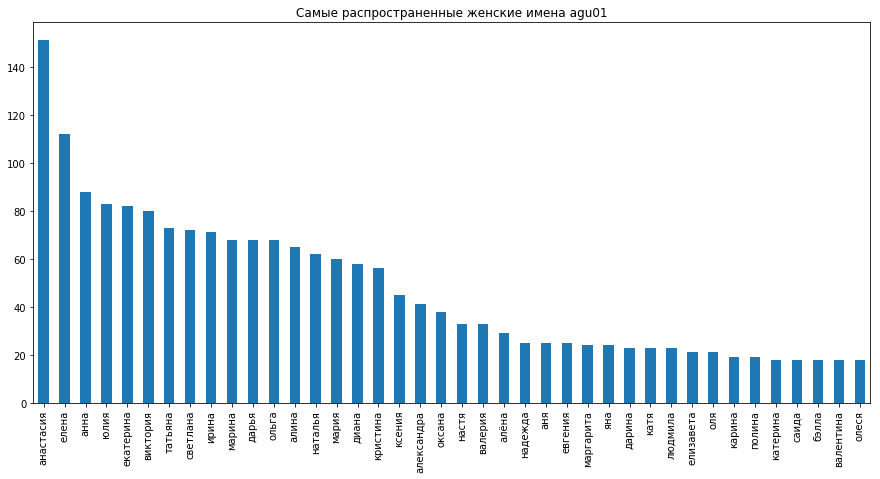

In [25]:
female_names = df[df["sex"] == 1]["first_name"].str.lower()
female_names = female_names[female_names != "deleted"]
female_names.value_counts().sort_values(ascending=False)\
    .head(40).plot(kind='bar', figsize=(15, 7), title="–°–∞–º—ã–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã–µ –∂–µ–Ω—Å–∫–∏–µ –∏–º–µ–Ω–∞ agu01")

In [8]:
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤ —Å –∑–∞–∫—Ä—ã—Ç—ã–º –∏–ª–∏ —É–¥–∞–ª–µ–Ω–Ω—ã–º –ø—Ä–æ—Ñ–∏–ª–µ–º:", 
      df[df["is_closed"] | (df["first_name"] == "DELETED")].shape[0])

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤ —Å –∑–∞–∫—Ä—ã—Ç—ã–º –∏–ª–∏ —É–¥–∞–ª–µ–Ω–Ω—ã–º –ø—Ä–æ—Ñ–∏–ª–µ–º: 1359


In [9]:
df_posts = pd.read_csv("agu_posts.csv")
df_posts.sort_values(by=["likes_count", "comments_count"], ascending=False).head()

from_id  owner_id                                  domain  \
68  -133450   -133450  https://vk.com/feed?w=wall-133450_7012   
76  -133450   -133450  https://vk.com/feed?w=wall-133450_6956   
71  -133450   -133450  https://vk.com/feed?w=wall-133450_7007   
1   -133450   -133450  https://vk.com/feed?w=wall-133450_7113   
9   -133450   -133450  https://vk.com/feed?w=wall-133450_7102   

                   date                                               text  \
68  2020-05-24 14:48:07  –ü—Ä–æ—à—ë–ª –≥–æ–¥, –∫–∞–∫ –ø—Ä–æ–ø–∞–ª–∞ –î–∞—à–∞.    –í —à–µ—Å—Ç–Ω–∞–¥—Ü–∞—Ç—å...   
76  2020-05-15 14:41:38  –£—Ç–æ–ø–∞—é—â–∏–π –≤ –∑–µ–ª–µ–Ω–∏, –ª—é–±–∏–º—ã–π, —Ä–æ–¥–Ω–æ–π... –û–Ω —Ç–∞–∫–æ...   
71  2020-05-23 10:22:31  –í–†–ï–ú–Ø –¢–í–û–†–ò–¢–¨ –î–û–ë–†–û  –°—Ç—É–¥–µ–Ω—Ç—ã –ê–¥—ã–≥–µ–∏ÃÜ—Å–∫–æ–≥–æ –≥–æ—Å...   
1   2020-07-15 08:17:25  –°–µ–≥–æ–¥–Ω—è, 15 –∏—é–ª—è —Å–≤–æ–π 55-–π –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è –æ—Ç–º–µ—á...   
9   2020-07-08 16:06:25  2 –∏—é–ª—è —Å–æ—Å—Ç–æ—è–ª—Å—è –ø–µ—Ä–≤—ã–π –≤ –∏—Å—Ç–æ—Ä–∏–∏ –ê–¥—ã–≥–µ–π—Å–∫–æ–≥–æ ...   

   copy_text copy_date  likes_count  comments_count  reposts  views  \
68       NaN       NaN          174               7        1   3623   
76       NaN       NaN          148              45        4   3938   
71       NaN       NaN           65               2        1   2547   
1        NaN       NaN           62               0        1    831   
9        NaN       NaN           62               0        2   1711   

                                               likers  \
68  209802,562487,686674,1661991,1884493,3559765,4...   
76  206261992,130892,653640,686674,1884493,4771577...   
71  27378328,28108814,122678968,143748857,15659110...   
1   290268617,484321245,342341436,325937504,672746...   
9   135393204,560379093,87159841,11684962,15025633...   

                                             comments  \
68  –°–≤–µ—Ç–ª–∞—è –ø–∞–º—è—Ç—åüôèüèª | –ê —á—Ç–æ —Å –Ω–µ–π —Å–ª—É—á–∏–ª–æ—Å—å | –°–≤–µ...   
76  –ö—Ä—É—Ç–∞—è –æ–±—â–∞–≥–∞ | –°–ª–∞–≤–Ω–æ–µ –≤—Ä–µ–º—è | –õ—é–±–æ–≤—å –≤–µ—á–Ω–∞—è ...   
71  ü§ù | –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –∏ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —Ö–æ—Ç—å —Å–∞–º–∏ —Å–æ–≥–ª–∞...   
1                                                 NaN   
9                                                 NaN   

                                         commentators  
68                       440606579,27428261,173166559  
76  511927014,130892,365659512,263680145,213657982...  
71                                377249626,210167720  
1                                                 NaN  
9                                                 NaN

In [10]:
print("–°–∞–º—ã–π –ª–∞–π–∫–Ω—É—Ç—ã–π –ø–æ—Å—Ç –∏–∑ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö 100:")

most_liked = df_posts.loc[df_posts.likes_count.idxmax()]

print(most_liked.text)
print("–õ–∞–π–∫–æ–≤:", most_liked.likes_count)

–°–∞–º—ã–π –ª–∞–π–∫–Ω—É—Ç—ã–π –ø–æ—Å—Ç –∏–∑ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö 100:
–ü—Ä–æ—à—ë–ª –≥–æ–¥, –∫–∞–∫ –ø—Ä–æ–ø–∞–ª–∞ –î–∞—à–∞.    –í —à–µ—Å—Ç–Ω–∞–¥—Ü–∞—Ç—å –ª–µ—Ç –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –≤–æ—Ç –æ–Ω–∞, –Ω–∞—Å—Ç–æ—è—â–∞—è –∂–∏–∑–Ω—å ‚Äî —Ç–æ–ª—å–∫–æ –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è. –ß—Ç–æ —Ç–∞–º, –≤–ø–µ—Ä–µ–¥–∏, –∑–∞ –≤—ã–ø—É—Å–∫–Ω—ã–º–∏ —ç–∫–∑–∞–º–µ–Ω–∞–º–∏ —Ç–µ–±—è –∂–¥–µ—Ç —Ü–µ–ª—ã–π –º–∏—Ä, –ø–æ–ª–Ω—ã–π –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–µ–π –∏ —Å–≤–æ–±–æ–¥—ã.    –ù–æ –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –î–∞—à–∏ –®–æ–ø–∏–Ω–æ–π —Å—É–¥—å–±–∞ —Ä–∞—Å–ø–æ—Ä—è–¥–∏–ª–∞—Å—å –ø–æ-–¥—Ä—É–≥–æ–º—É.    –ì—É–ª–∫–∏–º —ç—Ö–æ–º –æ—Ç–æ–∑–≤–∞–ª–∞—Å—å —ç—Ç–∞ —Ç—Ä–∞–≥–µ–¥–∏—è –≤ –Ω–∞—à–∏—Ö —Å–µ—Ä–¥—Ü–∞—Ö. –û–±–∏–¥–Ω–æ –∏ –≥–æ—Ä—å–∫–æ.    –í—ã—Ä–∞–∂–∞–µ–º –∏—Å–∫—Ä–µ–Ω–Ω–∏–µ —Å–ª–æ–≤–∞ –ø–æ–¥–¥–µ—Ä–∂–∫–∏ —Å–µ–º—å–µ –®–æ–ø–∏–Ω—ã—Ö. –°–≤–µ—Ç–ª–∞—è –ø–∞–º—è—Ç—å –î–∞—à–µ.
–õ–∞–π–∫–æ–≤: 174


In [11]:
print("–°–∞–º—ã–π –æ–±—Å—É–∂–¥–∞–µ–º—ã–π –ø–æ—Å—Ç –∏–∑ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö 100:")

most_commented = df_posts.loc[df_posts.comments_count.idxmax()]

print(most_commented.text)
print("–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤:", most_commented.comments_count)

–°–∞–º—ã–π –æ–±—Å—É–∂–¥–∞–µ–º—ã–π –ø–æ—Å—Ç –∏–∑ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö 100:
–£—Ç–æ–ø–∞—é—â–∏–π –≤ –∑–µ–ª–µ–Ω–∏, –ª—é–±–∏–º—ã–π, —Ä–æ–¥–Ω–æ–π... –û–Ω —Ç–∞–∫–æ–π –æ–¥–∏–Ω ‚Äî –ª—é–±–∏–º—ã–π —É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç.  –ê —á—Ç–æ –¥–ª—è –≤–∞—Å –ê–ì–£? –û–ø–∏—à–∏—Ç–µ —É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç –≤ —Ç—Ä–µ—Ö —Å–ª–æ–≤–∞—Ö!
–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤: 45


In [12]:
df["quotes"].dropna()

3                    ‚Äú–ö—Ç–æ –Ω–µ —Å–º–∏—Ä–∏–ª—Å—è ‚Äî —Ç–æ—Ç –Ω–µ –ø–æ–±–µ–∂–¥–µ–Ω!‚Äù
12                               –ù—É —á—Ç–æ–±—ã –≤—Å–µ–º.....))))))
18      No Totti No Party  ‚Äî –ù–µ—Ç, –ö–∏—Ä–∫–æ—Ä–æ–≤ –º–Ω–µ –Ω–µ –Ω—Ä–∞–≤...
26      ~~~~~~~~~ - –ú–æ–∂–µ—Ç –±—ã—Ç—å, –ø—Ä–æ—Å—Ç–æ –Ω–µ —Ç–æ—Ç —á–µ–ª–æ–≤–µ–∫?...
44                       –í—Å–µ, —á—Ç–æ –Ω–∏ –¥–µ–ª–∞–µ—Ç—Å—è - –∫ –ª—É—á—à–µ–º—É
                              ...                        
5984    –õ–∏—á–Ω–æ –º–æ—è —Ü–∏—Ç–∞—Ç–∞ "–ñ–∏–≤–∏ —Å–µ–≥–æ–¥–Ω—è—à–Ω–∏–º –¥–Ω–µ–º, –Ω–æ –Ω–µ...
6021       –ò ¬¢–µœÅ–¥—Ü–µ √ø –º–µ–Ω—è œÉ–¥–ΩœÉ.  –ò –≤ ¬¢–µœÅ–¥—Ü–µ √ø –º–µ–Ω—è œÉ–¥√º–Ω.
6162                         –ü–µ—Ä–µ–º–µ–Ω! –¢—Ä–µ–±—É—é—Ç –Ω–∞—à–∏ —Å–µ—Ä–¥—Ü–∞
6265    We have a life within us that's quite differen...
6515    –¢–æ—Ç, –∫—Ç–æ –∏—â–µ—Ç –º–∏–ª–ª–∏–æ–Ω—ã, –≤–µ—Å—å–º–∞ —Ä–µ–¥–∫–æ –∏—Ö –Ω–∞—Ö–æ–¥–∏...
Name: quotes, Length: 233, dtype: object

In [13]:
df.id.to_csv("agu_ids.csv", index=False, header=False) # —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∏–¥–æ–≤ –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏

In [14]:
df_subs = pd.read_csv("agu_users_subs.csv")
df_subs.head()

user_id                                             groups  \
0   153472       64599002,40602553,41968638,48267027,62675857   
1   163719                                                NaN   
2   205024  43948962,4423,5847773,48749899,49204880,620233...   
3   212126                                           59165594   
4   329293      9410453,40400929,73424025,120428878,132357542   

                                             publics  
0  1113595,55359415,40316705,60777940,38379853,85...  
1  23403635,57851075,33377621,68988957,80941590,3...  
2  24943107,185869711,130756946,107875,4462929,29...  
3  188547814,33621085,127925490,87089684,17722950...  
4  52860645,195596239,166068557,156523840,5964994...

In [33]:
groups = df_subs.groups.dropna().str.split(",").tolist()
groups = list(itertools.chain(*groups))

groups = pd.DataFrame(Counter(groups).most_common(100), columns=['id', 'subscribers'])
groups['name'] = pd.Series(dtype='string')
 
# –∑–∞–≥—Ä—É–∑–∫–∞ –Ω–∞–∑–≤–∞–Ω–∏–π –≥—Ä—É–ø–ø –∏–∑ –≤–∫ –∞–ø–∏
pars = {"v" : "5.103",
       "access_token" : "92da160e6f2d5ada2c79f1e224edd23343940eea30fe38f7f22f59cd7af02a5102f3e90f7c85f62e8b5c7",
       "group_ids" : ",".join(groups["id"].tolist()),
       "fields" : "name"}
req = requests.get('https://api.vk.com/method/groups.getById', params = pars)

# –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏–¥–æ–≤ –≤ –Ω–∞–∑–≤–∞–Ω–∏—è
for g in json.loads(req.text)["response"]:
    groups.loc[groups.id.astype(int) == g["id"], "name"] = g["name"] 

print("–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –≥—Ä—É–ø–ø—ã —É –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤ agu01:")
groups.head(20)

–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –≥—Ä—É–ø–ø—ã —É –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤ agu01:


id  subscribers                                              name
0      133450         1473      –ê–¥—ã–≥–µ–π—Å–∫–∏–π –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã–π —É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç (–ê–ì–£)
1    43097537          259                   –°–æ—é–∑ –°—Ç—É–¥–µ–Ω—Ç–æ–≤ –∏ –ê—Å–ø–∏—Ä–∞–Ω—Ç–æ–≤ –ê–ì–£
2    73092716          209                                 –î–æ–¥–æ –ü–∏—Ü—Ü–∞ –ú–∞–π–∫–æ–ø
3   148289111          114                  –°—Ç—Ä–æ–∫–∏ –ø—ã–ª—å–Ω—ã—Ö –∫–Ω–∏–≥ | –õ–∏—Ç–µ—Ä–∞—Ç—É—Ä–∞
4    83875167           81                       Gindir Dunya - Gendir Dunya
5         491           80                                       Comedy Club
6   133974750           80                                          –ê–Ω–∞—Ç–æ–º–∏—è
7    36042178           80                              T√ºrkmen sungat √§lemi
8       19043           78                                       –ï–≤—Ä–æ–ø–∞ –ü–ª—é—Å
9    93522989           78                  –°—Ç—É–¥–µ–Ω—á–µ—Å–∫–∏–π –°–ø–æ—Ä—Ç–∏–≤–Ω—ã–π –∫–ª—É–± –ê–ì–£
10   40587282           77                                              4MEN
11  109100740           74                –ú–∞–π–∫–æ–ø ‚óÑ –ù–æ–≤–æ—Å—Ç–∏ - –ê—Ñ–∏—à–∞ ‚ñ∫ go01.ru
12   48715701           69  –ë–µ–∑–¥–æ–º–Ω—ã–µ –∂–∏–≤–æ—Ç–Ω—ã–µ –ú–∞–π–∫–æ–ø–∞,—Å–æ–æ–±—â–µ—Å—Ç–≤–æ –≤–æ–ª–æ–Ω—Ç–µ—Ä–æ–≤
13  105879609           68                                       Dana sozler
14   67164927           63             –§–∞–∫—É–ª—å—Ç–µ—Ç –ø–µ–¥–∞–≥–æ–≥–∏–∫–∏ –∏ –ø—Å–∏—Ö–æ–ª–æ–≥–∏–∏ –ê–ì–£
15   54670859           62                      –§–∞–∫—É–ª—å—Ç–µ—Ç –ï—Å—Ç–µ—Å—Ç–≤–æ–∑–Ω–∞–Ω–∏—è –ê–ì–£
16  151204563           61                           –û–ø–µ—Ä–∞—Ü–∏–æ–Ω–Ω–∞—è | –ú–µ–¥–∏—Ü–∏–Ω–∞
17    6136139           61                                     –ó–Ω–∞–µ—Ç–µ –ª–∏ –í—ã?
18  142419543           61                                        rgrgrgrgrg
19    2087106           60         - –°–ü–û–†–¢–ò–í–ù–´–ô –ö–õ–£–ë "–¢–ò–¢–ê–ù" -  –≥–æ—Ä–æ–¥ –ú–∞–π–∫–æ–ø

In [34]:
publics = df_subs.publics.dropna().str.split(",").tolist()
publics = list(itertools.chain(*publics))

publics = pd.DataFrame(Counter(publics).most_common(100), columns=['id', 'subscribers'])
publics['name'] = pd.Series(dtype='string')
 
# –∑–∞–≥—Ä—É–∑–∫–∞ –Ω–∞–∑–≤–∞–Ω–∏–π –≥—Ä—É–ø–ø –∏–∑ –≤–∫ –∞–ø–∏
pars = {"v" : "5.103",
       "access_token" : "92da160e6f2d5ada2c79f1e224edd23343940eea30fe38f7f22f59cd7af02a5102f3e90f7c85f62e8b5c7",
       "group_ids" : ",".join(publics["id"].tolist()),
       "fields" : "name"}
req = requests.get('https://api.vk.com/method/groups.getById', params = pars)

for g in json.loads(req.text)["response"]:
    publics.loc[publics.id.astype(int) == g["id"], "name"] = g["name"] 

# –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏–¥–æ–≤ –≤ –Ω–∞–∑–≤–∞–Ω–∏—è
print("–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–∞–±–ª–∏–∫–∏ —É –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤ agu01:")
publics.head(20)

–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–∞–±–ª–∏–∫–∏ —É –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤ agu01:


id  subscribers                                      name
0    1113595         1263                             –ú–ê–ô–ö–û–ü –ê–î–´–ì–ï–Ø
1   61408089          801                          –ü—Ä–∏–∑–Ω–∞–≤–∞—à–∫–∏  –ê–ì–£
2   35593725          777                               –ú–∞–π–∫–æ–ø –°–∏—Ç–∏
3   27895931          747       –ù–æ–≤–∏–Ω–∫–∏ –ú—É–∑—ã–∫–∏ 2020 | –õ—É—á—à–∞—è –ú—É–∑—ã–∫–∞
4   32771925          709                           –¢–∏–ø–∏—á–Ω–∞—è –ê–¥—ã–≥–µ—è
5   55034907          704                                    –ü—Ä–∏–≤–µ—Ç
6   43215063          642                  –ö–∏–Ω–æ–º–∞–Ω–∏—è ‚ñ∫ –ù–æ–≤–∏–Ω–∫–∏ 2020
7   35287407          622                           JOY LAND –ú–∞–π–∫–æ–ø
8   22798006          581              –ö–∏–Ω–æ–º–∞–Ω–∏—è | –§–∏–ª—å–º—ã | –°–µ—Ä–∏–∞–ª—ã
9   85774102          574                         –ü–æ–¥—Å–ª—É—à–∞–Ω–æ –ú–∞–π–∫–æ–ø
10  58170807          559                  –ö–∏–Ω–æ–ö–∞–π—Ñ - –õ—É—á—à–∏–µ —Ñ–∏–ª—å–º—ã
11  91050183          524                       –õ–µ–æ–Ω–∞—Ä–¥–æ –î–∞–π –í–∏–Ω—á–∏–∫
12  49439086          519                            –î–æ–º–∞ –Ω–µ –ø–æ–π–º—É—Ç
13  56106344          511                                 –ü–∞–ª–∞—Ç–∞ ‚Ññ6
14  38683579          499  –õ—É—á—à–∏–µ —Å—Ç–∏—Ö–∏ –≤–µ–ª–∏–∫–∏—Ö –ø–æ—ç—Ç–æ–≤ | –õ–∏—Ç–µ—Ä–∞—Ç—É—Ä–∞
15  57846937          471                                       MDK
16  54722639          459                           –≤ –ê–¥—ã–≥–µ–µ –ø–æ–π–º—É—Ç
17  43776215          413                               –Ø —Ç–µ–±—è —Ö–æ—á—É
18  26419239          390                         –°–º–µ–π—Å—è –¥–æ —Å–ª—ë–∑ :D
19  70145140          386               –ê–≤—Ç–æ—Ä—ã–Ω–æ–∫ |–ê–¥—ã–≥–µ—è-–ö—Ä–∞—Å–Ω–æ–¥–∞—Ä